# K-Means Clustering

## Contents

* Introduction
* Application on Dataset
   * Data Visualization
   * Modeling 
* Error Analysis

## Introduction

K-Means Clustering is an unsupervised machine learning algorithm for clustering data. Its goal is to divide the dataset into K different clusters (clusters) such that each data point belongs to one of the clusters and the more similar the data points within each cluster are, the less similar the data points are between different clusters. The number of clusters K is specified in advance and usually needs to be determined based on knowledge of the specific problem domain or experimental results.

The basic idea of the K-Means algorithm is to randomly select K centroids, then assign each data point to the cluster represented by the nearest centroid, then recalculate the centroids of each cluster, and keep repeating this process until convergence. The optimization goal of the K-Means algorithm is to minimize the sum of squares of the distances from each data point to the centroid of the cluster to which it belongs, called SSE (Sum of Squared Errors).

The advantage of the K-Means algorithm is that it is simple to implement, computationally efficient, and suitable for clustering large-scale data sets. However, it needs to specify the number of clusters K, is sensitive to the initialized centroids, tends to converge to a local optimal solution, and may not cluster well for clusters of different sizes, densities, and shapes.

## Application on Dataset

In [71]:
import numpy as np 
import pandas as pd 
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [72]:
warnings.filterwarnings('ignore')

In [73]:
data = pd.read_csv('/Users/liusiling/Desktop/semester2/577_github/Mall.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
df = data.iloc[:,1:]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [76]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [77]:
colnames = df.columns.tolist()
colnames

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

### Data Visualization

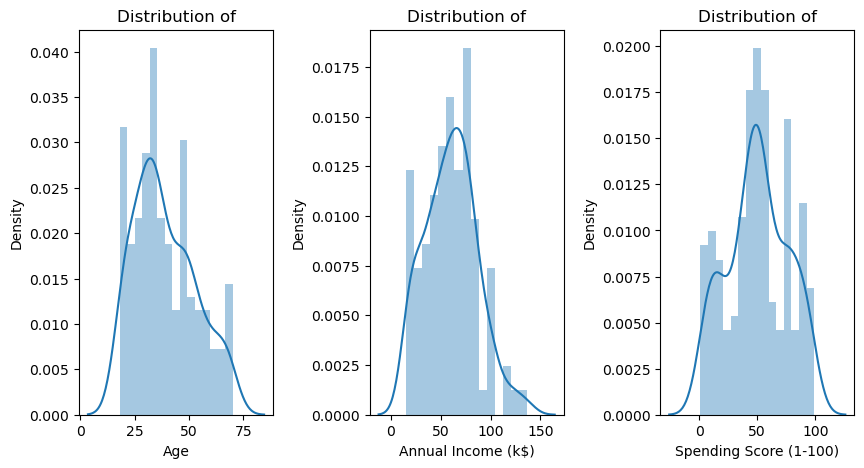

In [78]:
plt.figure(1 , figsize = (10 , 5))
n = 0 
for x in colnames[1:]:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distribution of'.format(x))
plt.show()

These plots show distribution of Age, Annual Income and Spending Score. All three distributions are relatively close to the normal distribution.

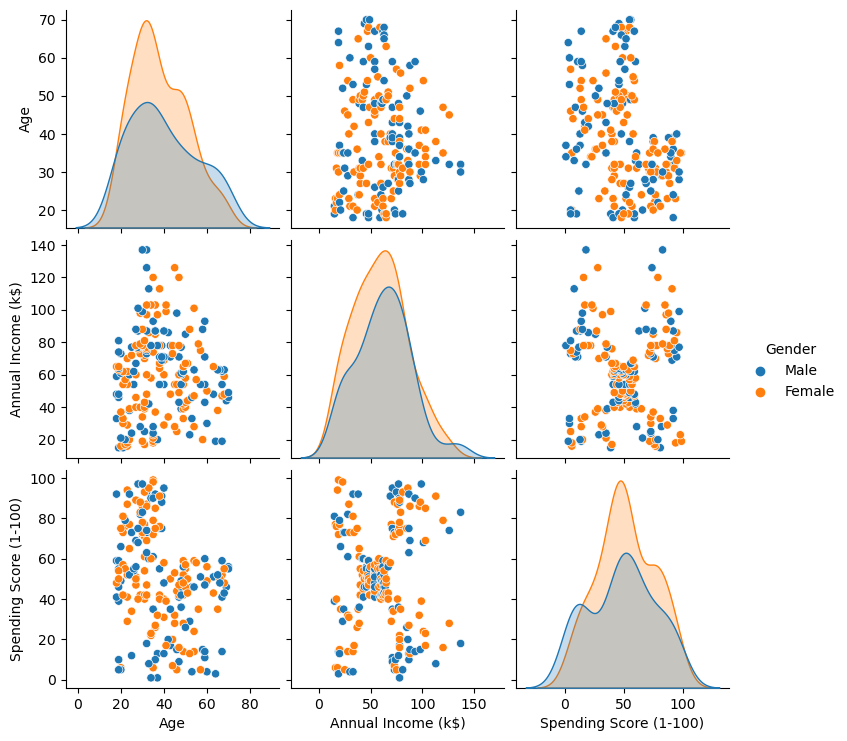

In [79]:
sns.pairplot(df, vars = colnames[1:], hue = "Gender")

## Modeling 

### Clustering based on Age and Spending Score

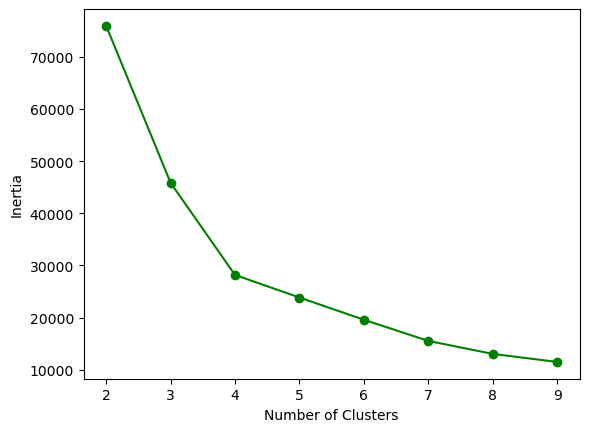

In [80]:
age_spending = df[['Age' , 'Spending Score (1-100)']].values
inertia = []
for n in range(2 , 10):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(age_spending)
    inertia.append(algorithm.inertia_)
plt.plot(np.arange(2 , 10) , inertia , 'o-g')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


From this plot, we can choose k=4.

#### Choose the number of clusters to be 4

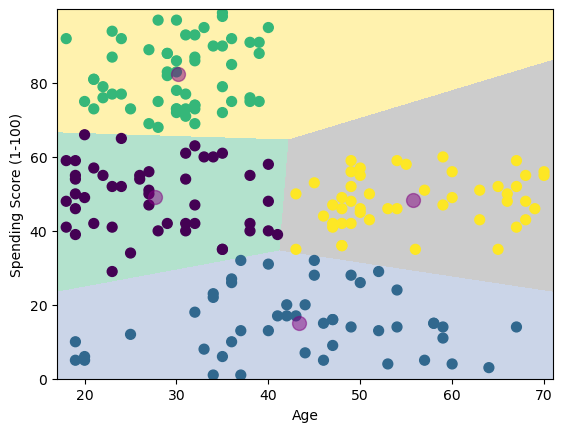

In [81]:
model = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') 
model.fit(age_spending)
label_as = model.labels_
centroids1 = model.cluster_centers_
h = 0.02
x_min, x_max = np.min(age_spending[:, 0]) - 1, np.max(age_spending[:, 0]) + 1
y_min, y_max = np.min(age_spending[:, 1]) - 1, np.max(age_spending[:, 1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.column_stack((xx.ravel(), yy.ravel())))

plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = label_as, s = 50)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 100 , c='purple', alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [82]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

X = df['Age']

# Calculate the squared distances between each data point and its assigned cluster center
distances = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    distances[i] = np.linalg.norm(X[i] - model.cluster_centers_[model.labels_[i]]) ** 2

# Calculate the MSE
mse = np.mean(distances)
print("MSE:", mse)

MSE: 1230.274822928331


### Clustering based on Annual Income and Spending Score

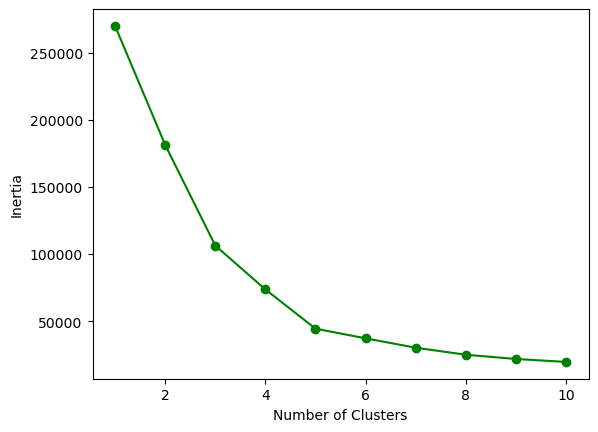

In [83]:
income_spending = df[['Annual Income (k$)' , 'Spending Score (1-100)']].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(income_spending)
    inertia.append(algorithm.inertia_)
plt.plot(np.arange(1 , 11) , inertia , 'o-g')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

From this plot,we can choose k = 5.

####  Choose the number of clusters to be 5

In [89]:
model2 = KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') 
model2.fit(income_spending)
## label_as = model.labels_
## centroids1 = model.cluster_centers_
h = 0.02
x_min, x_max = np.min(income_spending[:, 0]) - 1, np.max(income_spending[:, 0]) + 1
y_min, y_max = np.min(income_spending[:, 1]) - 1, np.max(income_spending[:, 1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model2.predict(np.column_stack((xx.ravel(), yy.ravel())))


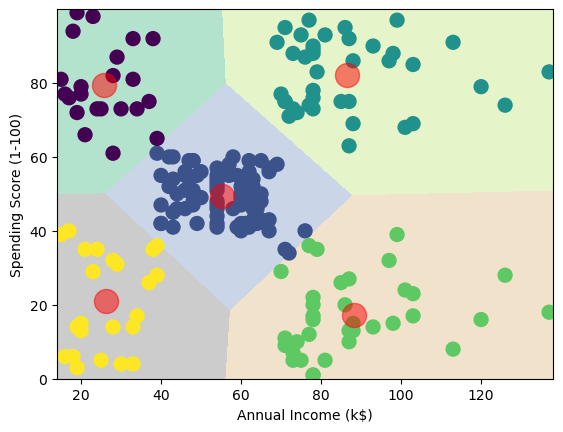

In [90]:
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [88]:
X = df['Annual Income (k$)']

# Calculate the squared distances between each data point and its assigned cluster center
distances = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    distances[i] = np.linalg.norm(X[i] - model2.cluster_centers_[model2.labels_[i]]) ** 2

# Calculate the MSE
mse = np.mean(distances)
print("MSE:", mse)

MSE: 1504.3304043589264
